In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [5]:
## Task 1: Exploratory Data Analysis (EDA)
# Step 1: Load the dataset and perform basic data exploration

wine_data = pd.read_csv(r"C:\\Data science\\Assignments\\wine.csv")


In [7]:
print(wine_data.info())
print(wine_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  

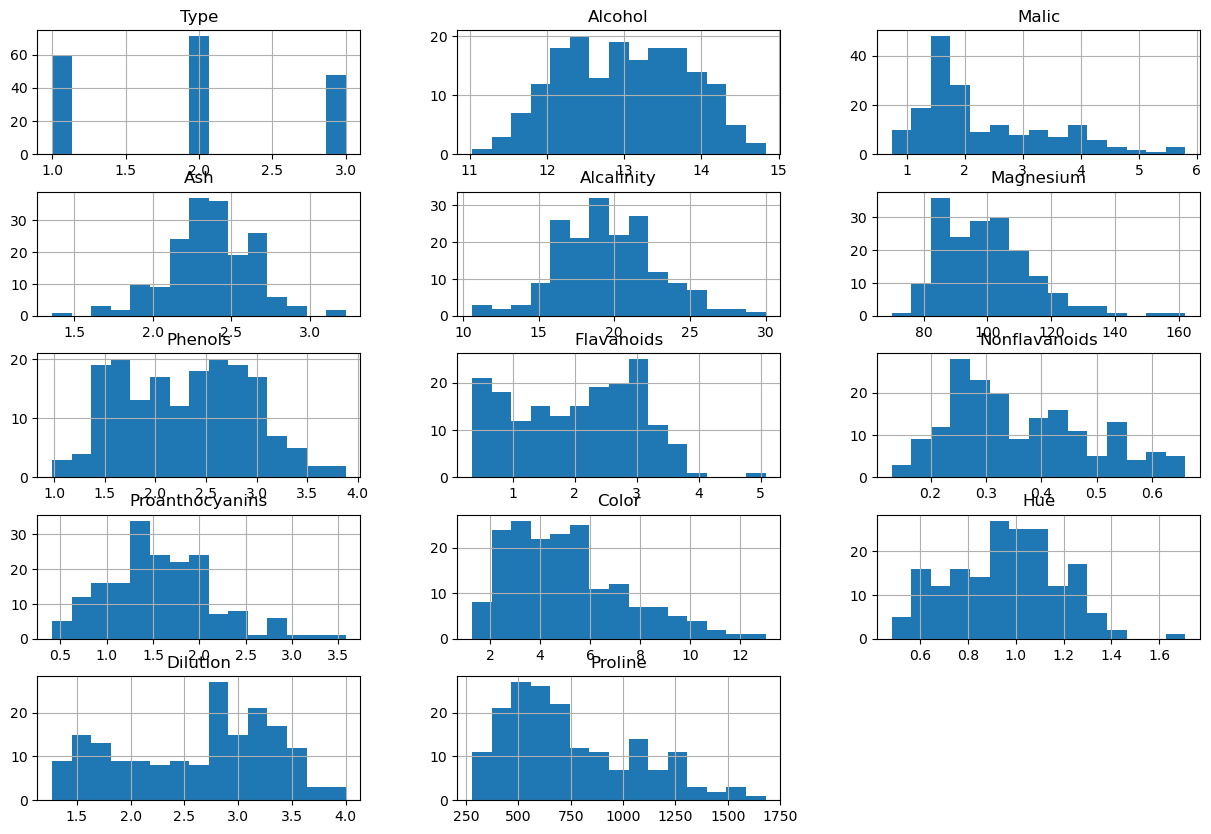

In [9]:
#Step 2: Examine the distribution of features
wine_data.hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.show()

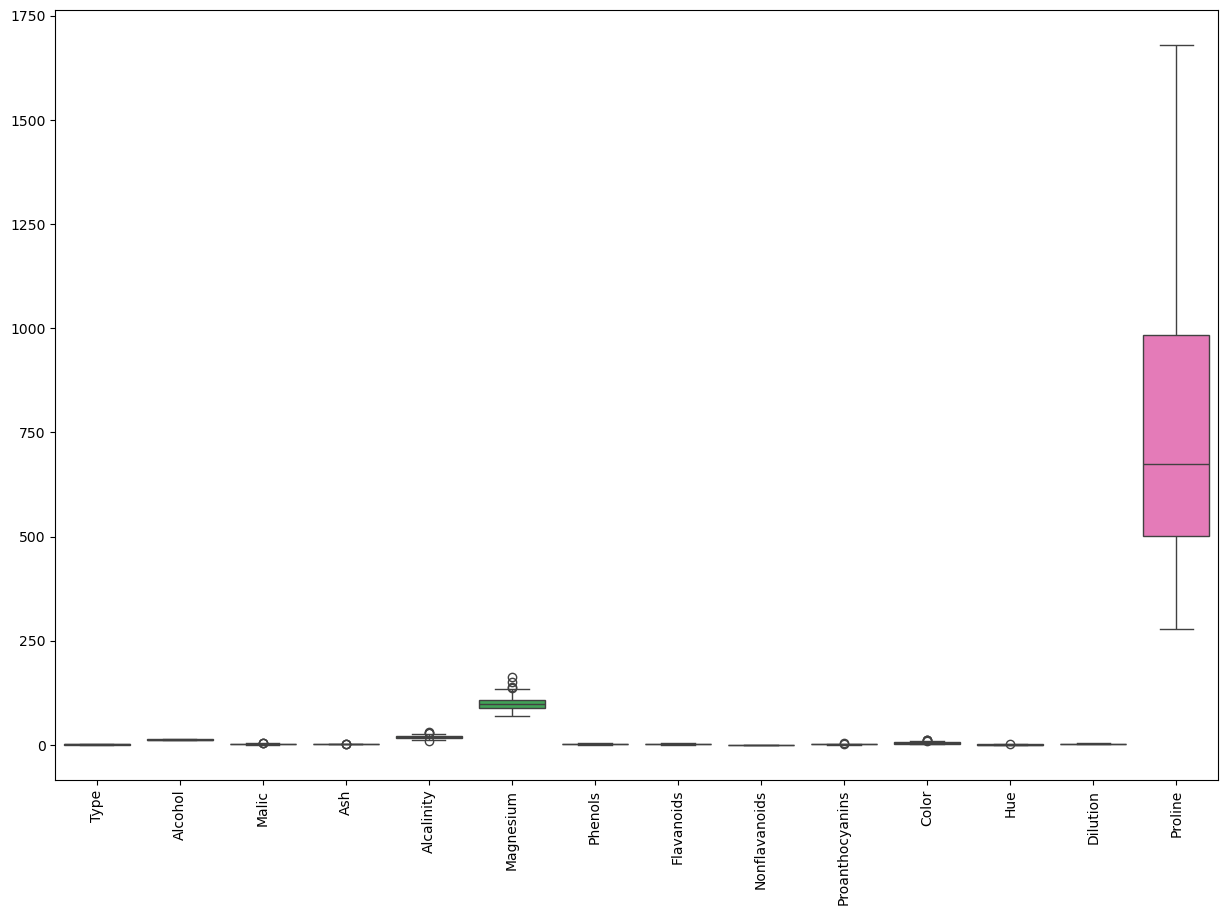

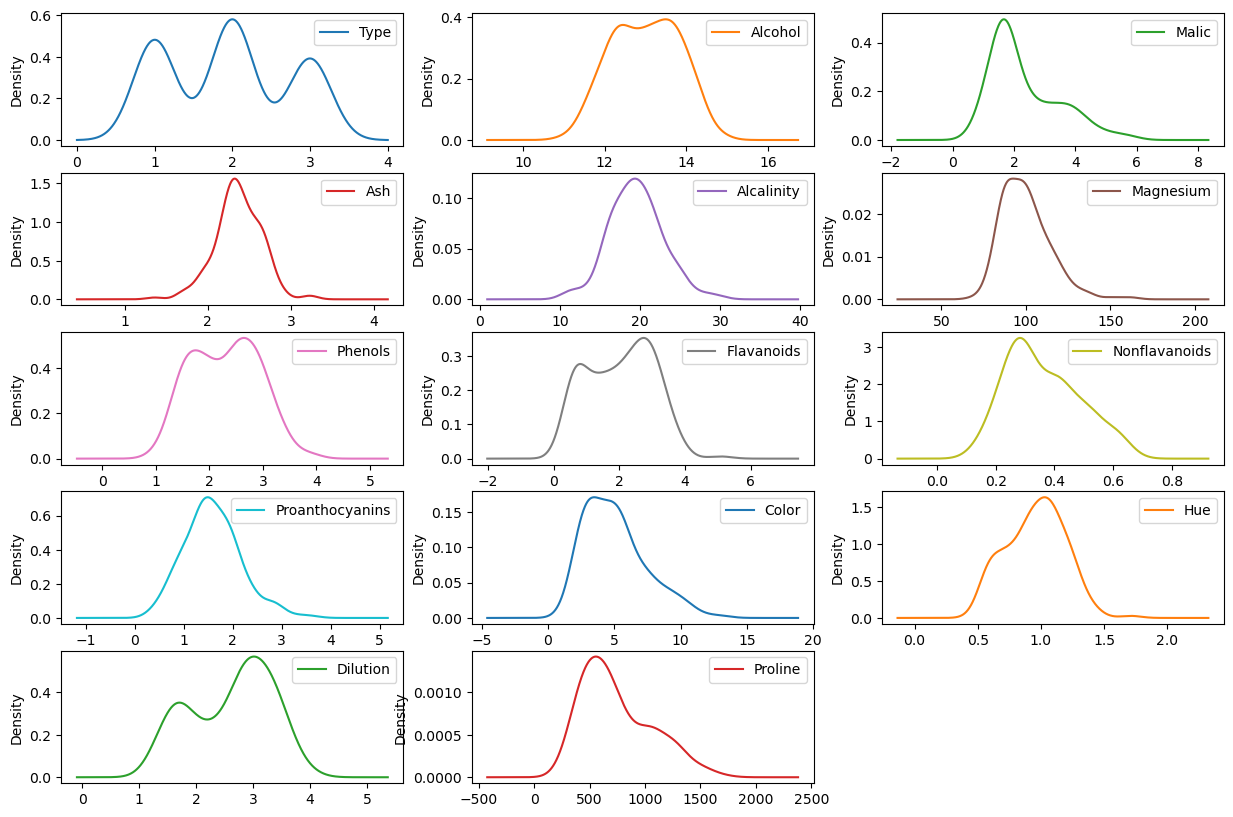

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_data)
plt.xticks(rotation=90)
plt.show()

wine_data.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(15, 10))
plt.show()

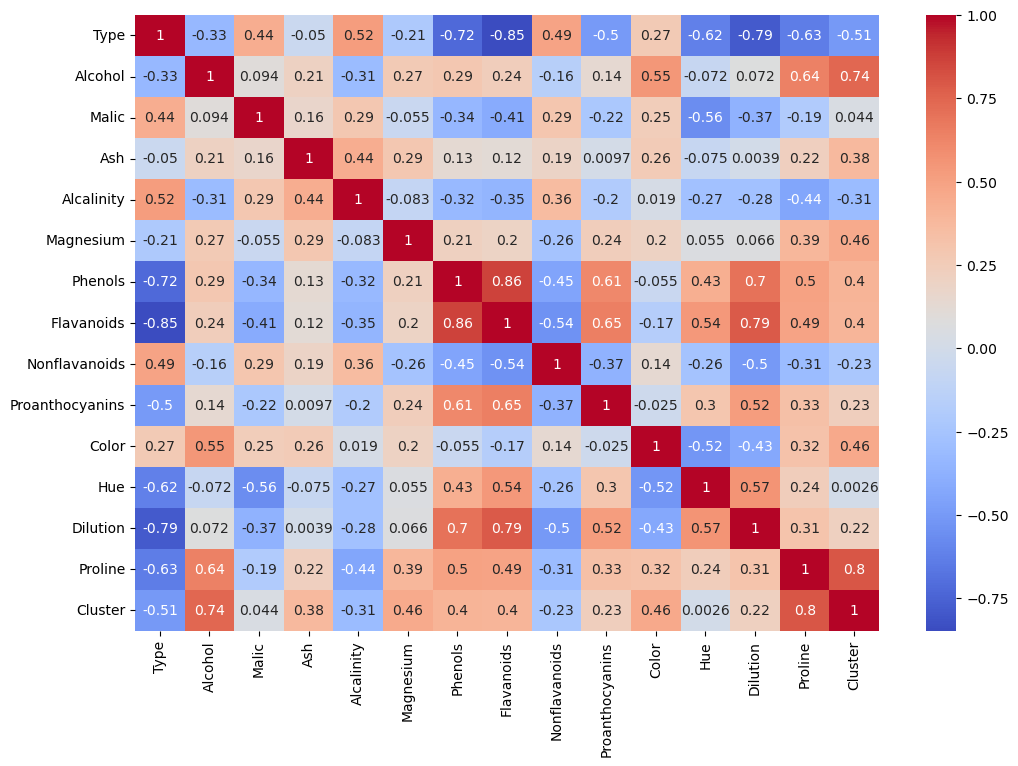

In [27]:
# Step 3: Investigate correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Task 2: Dimensionality Reduction with PCA
# Step 1: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)

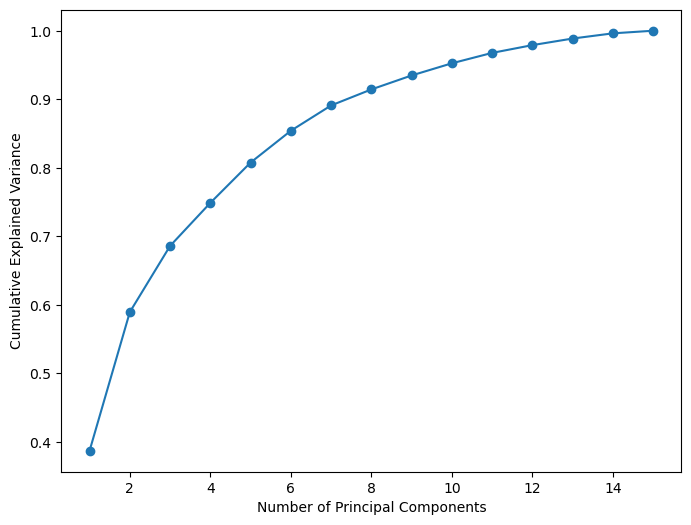

In [31]:
# Step 2: Implement PCA
pca = PCA()
pca.fit(scaled_data)

# Determine the optimal number of components
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [35]:
# Step 3: Transform the original dataset
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Task 3: Clustering with Original Data
# Step 1: Apply a clustering algorithm (K-means)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
wine_data['Cluster'] = kmeans_labels

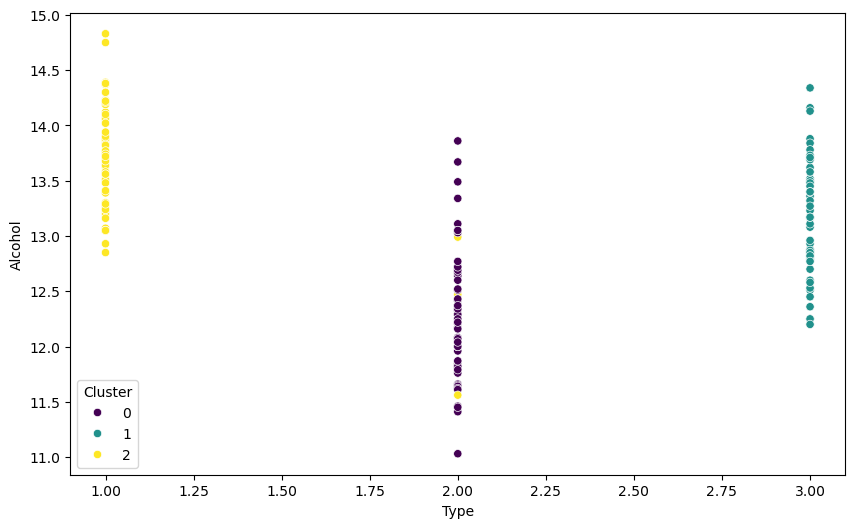

In [37]:
# Step 2: Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine_data.iloc[:, 0], y=wine_data.iloc[:, 1], hue='Cluster', data=wine_data, palette='viridis')
plt.show()

In [39]:
 #Step 3: Evaluate clustering performance
silhouette = silhouette_score(scaled_data, kmeans_labels)
davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.3493563848593293
Davies-Bouldin Index: 1.184307462636283


In [ ]:
# Task 4: Clustering with PCA Data
# Step 1: Apply K-means to PCA-transformed data
kmeans_pca_labels = kmeans.fit_predict(pca_data)
wine_data['PCA_Cluster'] = kmeans_pca_labels

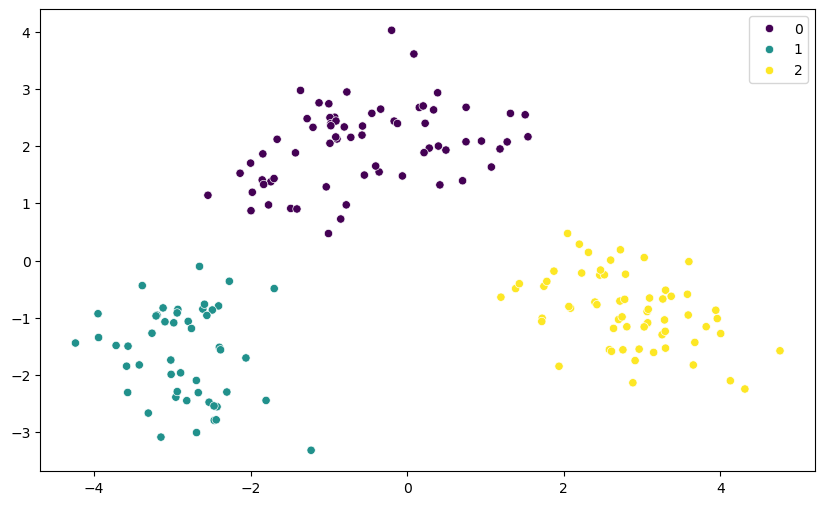

In [43]:
# Step 2: Visualize the clustering results from PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca_labels, palette='viridis')
plt.show()

In [45]:
# Task 5: Comparison and Analysis
# Step 1: Compare clustering results
comparison = pd.crosstab(wine_data['Cluster'], wine_data['PCA_Cluster'])
print(comparison)

PCA_Cluster   0   1   2
Cluster                
0            67   0   0
1             0  49   0
2             0   0  62


In [ ]:
# Step 2: Discuss any similarities or differences observed in the clustering results
# Add your observations here
# You can use Markdown cells in your notebook to write your analysis, e.g.,:
# - Did the PCA clusters match with the original clusters?
# - Were there any significant differences?
# - Which clustering method (original vs PCA) seems to separate the data better?

# Step 3: Reflect on the impact of dimensionality reduction on clustering performance
# Add your reflection here
# - How did PCA affect the clustering?
# - Did reducing dimensions help in better clustering, or did it obscure some patterns?

# Step 4: Analyze the trade-offs between using PCA and clustering directly on the original dataset
# Add your analysis here
# - What are the advantages of using PCA before clustering?
# - What are the potential drawbacks of using PCA?
# - Consider computation time, clarity of clusters, and potential loss of information.


In [ ]:
# Task 6: Conclusion and Insights

# Step 1: Summarize the key findings and insights from the assignment
# Write a summary of your main findings:
# - What did you learn about the data?
# - How did the clustering perform on the original vs PCA-transformed data?
# - What were the key differences?

# Step 2: Discuss the practical implications of using PCA and clustering in data analysis
# Consider situations where PCA might be particularly useful or when it might be better to use the original data.

# Step 3: Provide recommendations for when to use each technique based on the analysis conducted
# - Suggest scenarios where PCA + clustering is the best approach.
# - Suggest scenarios where clustering on the original data would be better.